# Movies Success - Analysis of the different factors impacting movies success
A project proposal by **Adi Benziony (313364549)**

## Introduction and Motivation
The film industry is a giant 100\$ billion a year industry (including movie theaters and home entertainment), each year thousands of new movies are released and some big box films can even gross billions of dollars alone.  
In 2019 _Avengers: Endgame_ grossed 2.8\$ billion, _The Lion King_ grossed 1.6\$ billion and [there's many more](https://en.wikipedia.org/wiki/2019_in_film#:~:text=The%20Lion%20King%2C%20Frozen%20II,%2Dgrossing%20animated%20films%2C%20respectively) like them.  
This massive production and consumption of movies is an interesting topic, since movies has a lot of aspects to them, plot, cast, direction and genre are just a few aspects of every movie, and they all impact its success.

In this notebook we'll try to look at some of the factors impacting the success of a movie.  
Possible questions we might ask our selves are what genre is more popular? Are there some genres critiqued more aggressively than others? Is there any corrolation between the movie's budget and its revenue? Maybe only in certain genres but not all?  
We will try to explore our dataset in search of answers to such questions.

When disscussing the _success_ of movies, it's important to define how we might measure it, success might be a higher score, higher revenue or maybe higher net gross, the definition of _success_ depends on the context. We'll look at how the different factors impact the success of a movie from a score standpoint and from a revenue standpoint.

## Dataset
This project is inspired by the dataset [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset) posted on Kaggle.  
The dataset is a combination of [_MovieLens_](https://movielens.org/) and [_TMDB_](https://www.themoviedb.org/).  
MovieLens is a research site run by _GroupLens Research_ at the University of Minnesota and contains 26 million ratings from 260,000 users, and _TMDB_ contains data on millions of movies.

Our dataset cotains 45,000 movies in various languages (but mostly English) and contains various properties like budget, revenue, genres, language, release date, duration, and ratings.

## Dataset Loading & Cleanup

We will be mainly using `movies-dataset/movies_metadata.csv`.  
Note, the original CSV uploaded to Kaggle had some lines with unescaped newlines in their movie description fields, the CSV in the project's Git repository is a fixed version of the CSV from Kaggle.

Let's load the dataset and start inspecting it:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
movies_metadata = pd.read_csv('movies-dataset/movies_metadata.csv')
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45463 non-null  float64
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

We can see that the `release_date` field is not of type `datetime`, so let's change that:

In [85]:
movies_metadata = pd.read_csv('movies-dataset/movies_metadata.csv', parse_dates=['release_date'])

# EDA

Now for some exploration, let's look at some rows of our dataset:

In [86]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


Before starting with our research, we need to know how skwed is our dataset, so let's look at some basic statistics of language, budget, revenu, release dates, duration, votes count and genres.

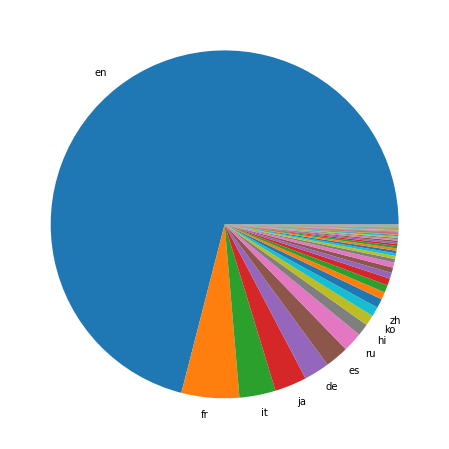

In [50]:
lng_counts = movies_metadata['original_language'].value_counts()

top_lng = lng_counts.index.tolist()[:10]
labels = top_lng + [""]*(lng_counts.index.size - 10)
plt.figure(figsize=(8, 8))
plt.pie(lng_counts, labels=labels)

plt.show()

English is the most dominent language in our dataset, while there's also French, Italian, Japanease, German, Spanish, Russian and more.

Let's look at statistics about the release dates and the duration:

Most of the movies in the dataset doesn't have budget or revenue specified, so we'll try to understand the distribution of those that do:

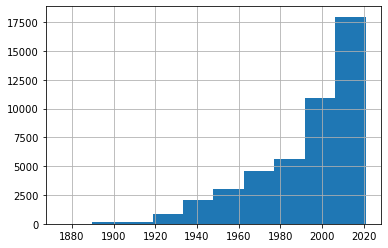

In [89]:
movies_metadata['release_date'].hist()
plt.show()

We can see that our dataset has much more movies from recent years.

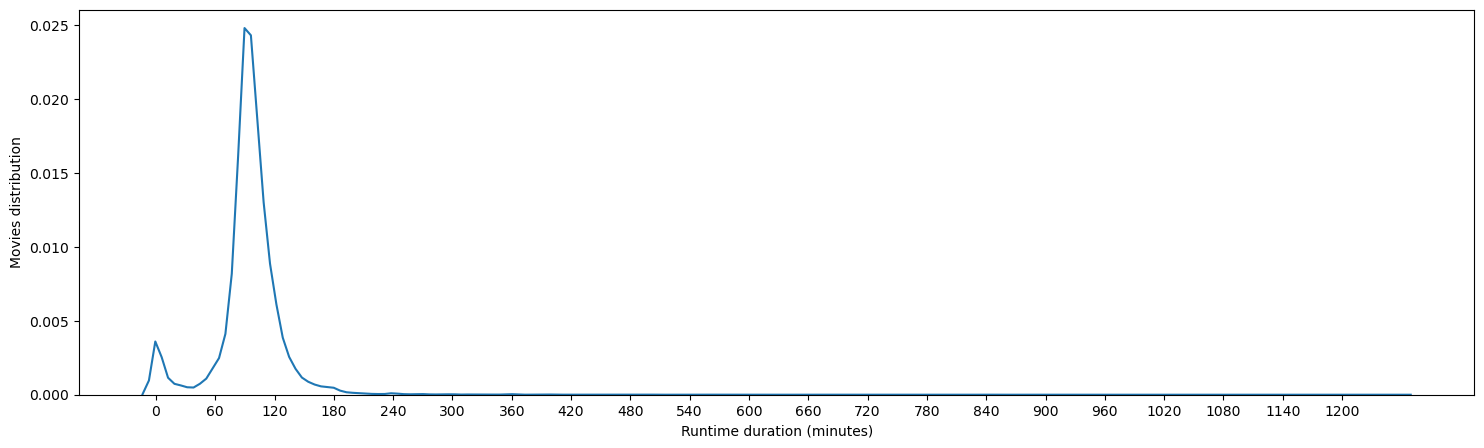

In [114]:
plt.figure(figsize=(18,5))
runtimes = movies_metadata['runtime']
sns.kdeplot(runtimes)
plt.xticks(np.arange(min(runtimes), max(runtimes), 60))  # Show ticks every hour
plt.xlabel("Runtime duration (minutes)")
plt.ylabel("Movies distribution")
plt.show()

The average duration is a little more than an hour and a half, and most movies are between an hour and 2 hours.

Next, let's take a look at the different genres.

The first step is to make the genres data usable. Currently the genres of each movie is stored as follows:

In [126]:
movies_metadata[movies_metadata['title'] == 'Toy Story'][['title', 'genres']]

,title,genres
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."


So we'll create a new `DataFrame` that will have a duplicate of each movie per its genre:

In [118]:
import json

movie_metadata_tmp = movies_metadata.copy()
movie_metadata_tmp["genre"] = np.nan

new_rows = []

for index, movie_metadata in movie_metadata_tmp.iterrows():
    movie_genres_details = json.loads(movie_metadata["genres"].replace('\'', '"'))
    movie_genres = [x["name"] for x in movie_genres_details]
    for movie_genre in movie_genres:
        movie_metadata["genre"] = movie_genre
        new_rows.append(movie_metadata.to_list())

movies_genres = pd.DataFrame(data=new_rows, columns=movie_metadata_tmp.columns)

And `movies_genres` will store movies' genres as follows:

In [128]:
movies_genres[movies_genres['title'] == 'Toy Story'][['title', 'genre']]

,title,genre
0,Toy Story,Animation
1,Toy Story,Comedy
2,Toy Story,Family


We have the following genres:

In [134]:
pd.DataFrame(movies_genres['genre'].unique())

,0
0,Animation
1,Comedy
2,Family
3,Adventure
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


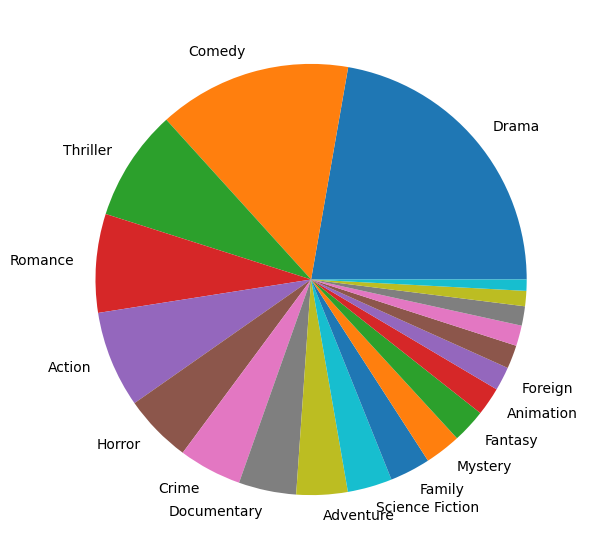

In [138]:
genres_count = movies_genres['genre'].value_counts()
top_genres = genres_count.index.tolist()[:15]
labels = top_genres + [""]*(genres_count.index.size - 15)
plt.figure(figsize=(7, 7))
a = plt.pie(genres_count, labels=labels)

It's clear that most movies produced are categorized as "Drama", "Comedy", "Thriller", "Romance", or "Action".

It will be interesting to see how different movie properties change based on genre. We'll keep it in mind going forward in this notebook.

<AxesSubplot:>

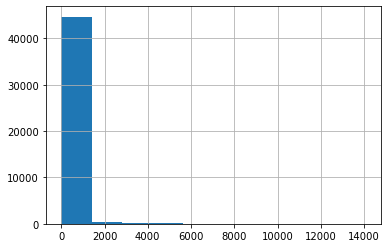

In [ ]:
movies_metadata['vote_count'].hist()

<AxesSubplot:>

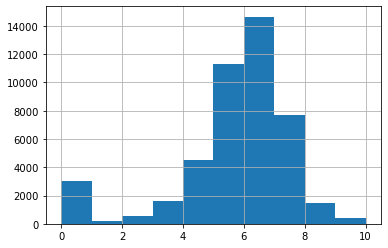

In [ ]:
movies_metadata['vote_average'].hist()

In [51]:
movies_metadata_with_budget = movies_metadata[movies_metadata['budget'] > 1000]
movies_metadata_with_revenue = movies_metadata[movies_metadata['revenue'] > 1000]

print(f'Movies with budget specified: {movies_metadata_with_budget.shape[0]:,}')
print(f'Movies with revenue specified: {movies_metadata_with_revenue.shape[0]:,}')

Movies with budget specified: 8,642
Movies with revenue specified: 7,253


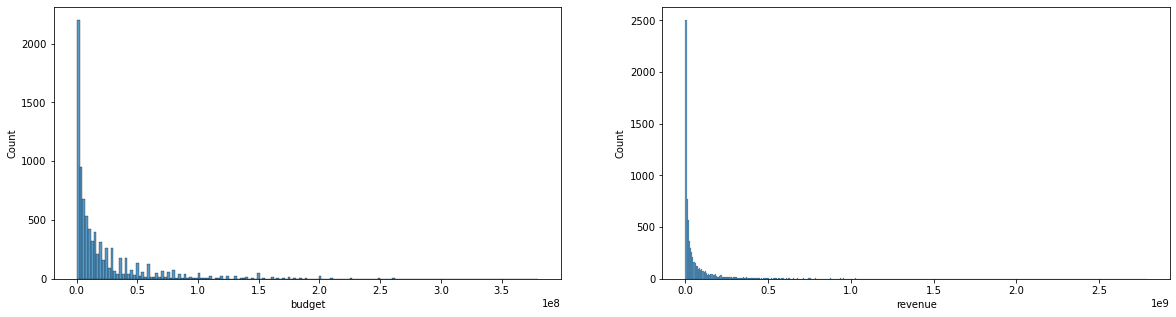

The average movie budget is: 22,224,251$
The average movie revenue is: 56,215,669$


In [70]:
figs, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.histplot(movies_metadata_with_budget['budget'], ax=axis[0])
sns.histplot(movies_metadata_with_revenue['revenue'], ax=axis[1])

plt.show()

budget_avg = movies_metadata_with_budget['budget'].mean()
revenue_avg = movies_metadata_with_budget['revenue'].mean()
print(f'The average movie budget is: {int(budget_avg):,}$')
print(f'The average movie revenue is: {int(revenue_avg):,}$')

## Dataset Clean Up
The `movies_metadata.csv` had some movies with newlines in their movie description, so it needed to be fixed, the updated CSV file can be found at the Git repository.

## Basic Data Visualization

## Finding Correlations

In [54]:
movies_with_revenue = movies_metadata[movies_metadata['revenue'] > 0]
movies_with_revenue = movies_metadata[movies_metadata['budget'] > 0]
movies_with_revenue = movies_with_revenue.sort_values('budget')

<AxesSubplot:xlabel='budget'>

<Figure size 1440x720 with 0 Axes>

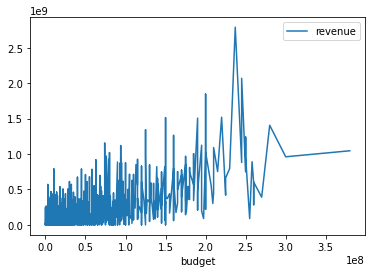

In [55]:
b = movies_with_revenue[["budget", "revenue"]]
b=b.set_index("budget")
plt.figure(figsize=(20, 10))
b.plot()

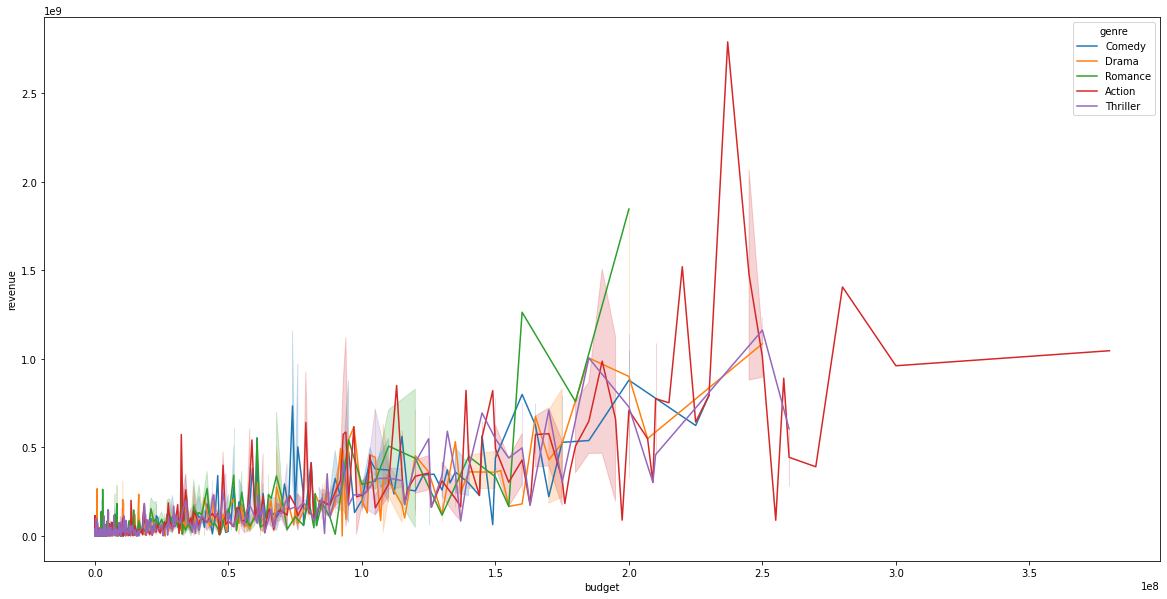

In [57]:
a = movies_genres[['budget', 'revenue', 'genre']]
a = a[a['genre'].isin(top_genres[:5])]
# a = a.astype({'budget': int, 'revenue':int}, errors='ignore')
a = a[a['revenue'] > 0]
a = a[a['budget'] > 0]

# a.groupby('genre')
# a = a.sort_values('budget')
# a.set_index('budget', inplace=True)
plt.figure(figsize=(20, 10))
# a.groupby('genre')['revenue'].plot(legend='true')

# sns.displot(data=a, x='budget', hue='genre', y='revenue', kind='kde')
sns.lineplot(data=a,  x='budget', hue='genre', y='revenue')
plt.show()

In [ ]:
import json

movie_metadata_tmp = movies_metadata.copy()
movie_metadata_tmp["genre"] = np.nan

new_rows = []

for index, movie_metadata in movie_metadata_tmp.iterrows():
    movie_genres_details = json.loads(movie_metadata["genres"].replace('\'', '"'))
    movie_genres = [x["name"] for x in movie_genres_details]
    for movie_genre in movie_genres:
        movie_metadata["genre"] = movie_genre
        new_rows.append(movie_metadata.to_list())

c = pd.DataFrame(data=new_rows, columns=movie_metadata_tmp.columns)